In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [183]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/GAIL.csv")

In [184]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,GAIL,EQ,67.80,65.00,70.0,65.0,68.80,68.70,67.91,76055,5.165166e+11,NaN,NaN,NaN
1,2000-01-04,GAIL,EQ,68.70,69.85,72.9,66.0,67.00,66.35,67.29,98097,6.600457e+11,NaN,NaN,NaN
2,2000-01-05,GAIL,EQ,66.35,68.35,68.7,61.1,63.00,63.20,65.24,92690,6.046889e+11,NaN,NaN,NaN
3,2000-01-06,GAIL,EQ,63.20,64.80,67.0,63.0,64.75,64.95,65.55,173654,1.138299e+12,NaN,NaN,NaN
4,2000-01-07,GAIL,EQ,64.95,65.90,65.9,62.0,62.90,62.65,63.76,86590,5.521388e+11,NaN,NaN,NaN


In [185]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4985 entries, 0 to 4984
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4985 non-null   object 
 1   Symbol              4985 non-null   object 
 2   Series              4985 non-null   object 
 3   Prev Close          4985 non-null   float64
 4   Open                4985 non-null   float64
 5   High                4985 non-null   float64
 6   Low                 4985 non-null   float64
 7   Last                4985 non-null   float64
 8   Close               4985 non-null   float64
 9   VWAP                4985 non-null   float64
 10  Volume              4985 non-null   int64  
 11  Turnover            4985 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4797 non-null   float64
 14  %Deliverble         4797 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 584.3

In [186]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4985.000000,4.985000e+03,4.985000e+03,2456.000000,4.797000e+03,4797.000000
mean,292.107161,292.555015,297.299248,287.332066,292.135005,292.120090,292.335252,3.100069e+06,7.139141e+13,44548.929967,1.364708e+06,0.527357
std,129.646711,129.714584,131.455571,127.881718,129.622548,129.628103,129.634307,5.865432e+06,9.001079e+13,33130.648961,1.974107e+06,0.158171
min,43.500000,44.800000,45.700000,43.000000,43.750000,43.500000,43.590000,5.000000e+01,3.101000e+08,486.000000,3.792000e+03,0.095700
25%,197.000000,197.450000,201.800000,193.400000,197.000000,197.000000,197.730000,7.347350e+05,2.188007e+13,21391.750000,3.983970e+05,0.421500
50%,326.100000,326.050000,331.800000,321.450000,326.000000,326.100000,326.540000,1.364395e+06,4.595320e+13,35444.500000,7.726460e+05,0.536400
75%,389.100000,389.200000,395.800000,383.400000,388.900000,389.100000,389.330000,2.738720e+06,9.037648e+13,58707.250000,1.494459e+06,0.638100
max,543.600000,545.000000,555.500000,536.050000,545.000000,543.600000,545.280000,1.147153e+08,1.648602e+15,385848.000000,4.549038e+07,1.000000


In [187]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [188]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [189]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [190]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [191]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [192]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [193]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
4980,1.734104,-0.535578,130.00,6020366,NaN
4981,2.153846,1.192308,131.55,11823364,NaN
4982,1.515152,0.641509,133.35,6883321,NaN
4983,2.325581,0.074239,134.80,9284829,NaN
4984,6.916100,2.810041,137.20,21349478,NaN


In [194]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_17924\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [195]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [196]:
#Define the prediction model
model = RandomForestRegressor()

In [197]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [198]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.925296627008017


In [199]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [200]:
predictions = model.predict(X_Check)

In [201]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

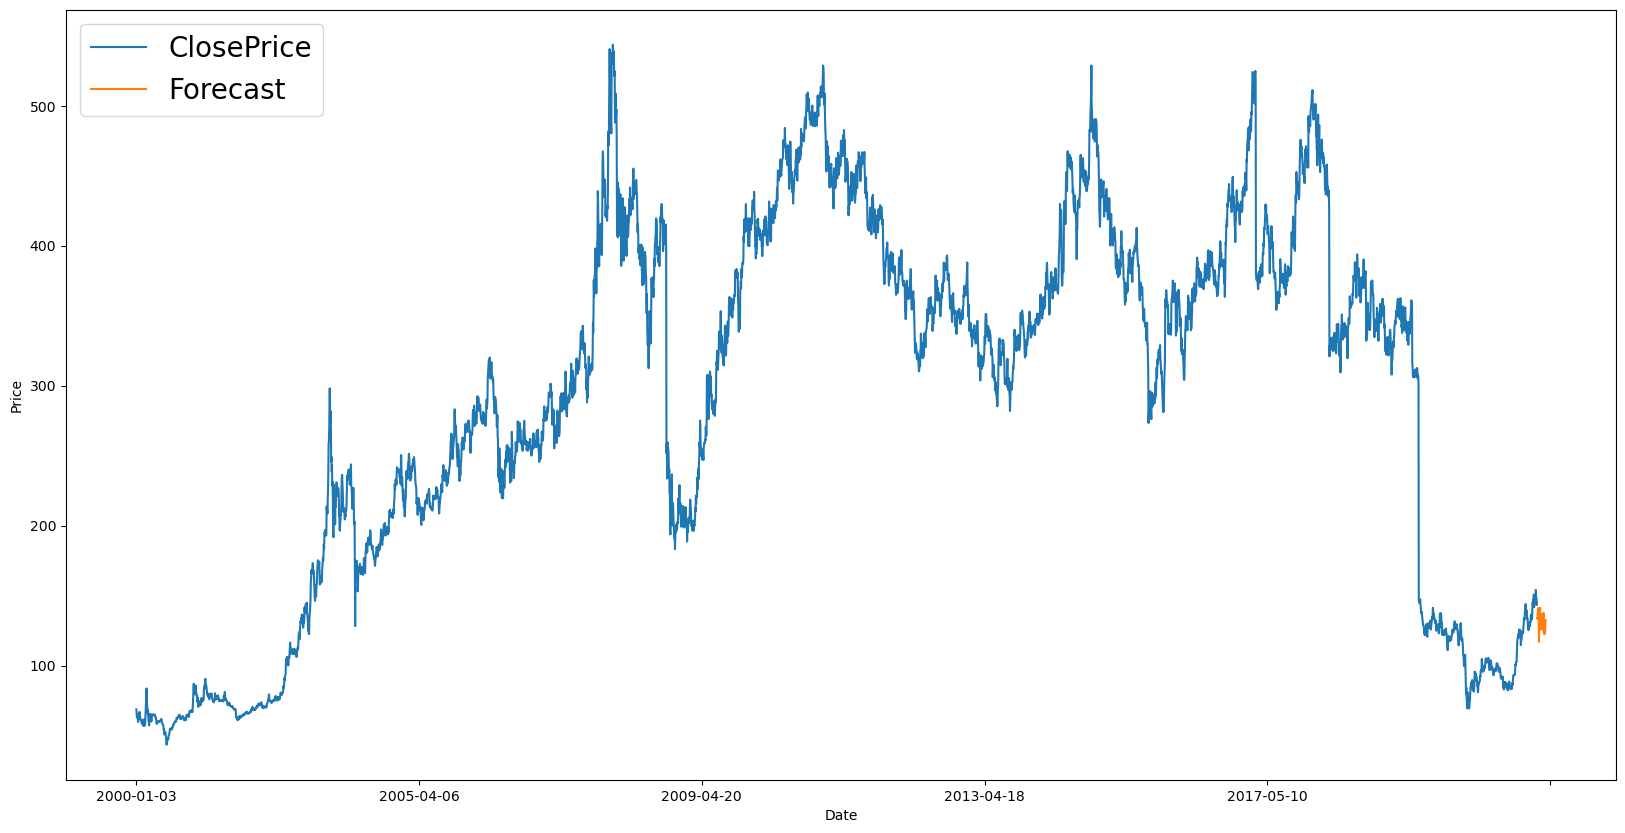

In [202]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')